In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from collections import Counter
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

sns.set()

%matplotlib inline

In [12]:
data = pd.read_csv('data/train.csv')
definitions = pd.read_csv('data/VariableDefinitions.csv')

## Data Preprocessing

In [13]:
data.drop("uniqueid", axis=1, inplace=True)

In [14]:
data['bank_account'] = data['bank_account'].apply(lambda x: 0 if x == 'No' else 1)
data.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [15]:
X = pd.get_dummies(data, drop_first=True)
X.head()

,year,bank_account,household_size,age_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,1,3,24,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,0,5,70,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,1,5,26,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,1
3,2018,0,5,34,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,0,8,26,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [16]:
# for the training data
y = X.bank_account.values
X.drop('bank_account', axis=1, inplace=True)

In [17]:
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression



In [87]:
over = SMOTE(sampling_strategy = 0.2)
under = RandomUnderSampler(sampling_strategy = 0.5)

In [89]:
# Create train and test sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)

# split the data for the validation and testing sets
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.2, random_state=42)

In [90]:
steps1 = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps1)
X_train, y_train = pipeline.fit_resample(X_train, y_train)


# Machine Learning Algorithms

In [21]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()), 
                     ('lr_classifier',LogisticRegression(random_state=42))])
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('dt_classifier',DecisionTreeClassifier(random_state=42))])
#pipeline_svm = Pipeline([('scalar3', StandardScaler()),
#                         ('pca4',PCA(n_components=2)),
 #                     ('clf', svm.SVC(cache_size=7000))])
pipeline_knn = Pipeline([('scalar3', StandardScaler()),
                      ('clf', KNeighborsClassifier())])

In [22]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_knn]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'K-Nearest-Neighbors'}


In [23]:
pipeline_knn.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scalar3', 'clf', 'scalar3__copy', 'scalar3__with_mean', 'scalar3__with_std', 'clf__algorithm', 'clf__leaf_size', 'clf__metric', 'clf__metric_params', 'clf__n_jobs', 'clf__n_neighbors', 'clf__p', 'clf__weights'])

In [41]:
grid_param_lr = {'lr_classifier__C':[100, 10, 1.0, 0.1, 0.01],'lr_classifier__penalty':['l2'],'lr_classifier__solver':['newton-cg', 'lbfgs', 'liblinear']}
grid_param_dt = {'dt_classifier__criterion':['gini', 'entropy'],'dt_classifier__max_depth':range(1,25),'dt_classifier__splitter': ['best', 'random']}
#grid_param_svm = {'clf__C': [0.1, 1, 10, 100, 1000], 'clf__gamma': [1, 0.1, 0.01, 0.001, 0.0001],'clf__kernel': ['rbf']}
#grid_param_svm = {'clf__C': [0.1, 1, 10, 100, 1000],'clf__kernel': ['linear']}
grid_param_knn = {'clf__leaf_size': [1,2,3,5],'clf__n_neighbors': [2,3,4,5],'clf__p':[1,2]}

The code below shows the global accuracy and classification report of each classifier before tuning the hyerparameters.

In [1]:
for pipe in pipelines:
  pipe.fit(X_train, y_train)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))
    print(classification_report(y_test, model.predict(X_test),target_names=['No', 'Yes']))
    #print(classification_report(y_test, y_pred))

NameError: name 'pipelines' is not defined

# Tuning Hyperparameters

## Logistic Regression


In [112]:
gridsearch_lr = GridSearchCV(pipeline_lr, grid_param_lr,cv=5)
lr_result = gridsearch_lr.fit(X_train,y_train)

#test pred
grid_predictions_lr = gridsearch_lr.predict(X_test)
#train pred
trainPredicted = gridsearch_lr.predict(X_train)
#calidation pred
valid_pred_lr = gridsearch_lr.predict(X_valid)

lr_result.score(X_test,y_test)
print("Accuracy: {}".format(gridsearch_lr.score(X_test, y_test)))
print(classification_report(y_test, grid_predictions_lr,target_names=['No', 'Yes']))
print("Tuned Model Parameters: {}".format(gridsearch_lr.best_params_))

Accuracy: 0.8544102019128587
              precision    recall  f1-score   support

          No       0.93      0.90      0.92       818
         Yes       0.45      0.52      0.48       123

    accuracy                           0.85       941
   macro avg       0.69      0.71      0.70       941
weighted avg       0.86      0.85      0.86       941

Tuned Model Parameters: {'lr_classifier__C': 0.01, 'lr_classifier__penalty': 'l2', 'lr_classifier__solver': 'liblinear'}


Text(0.5, 1.0, 'Accuracy on training set: 79.51%')

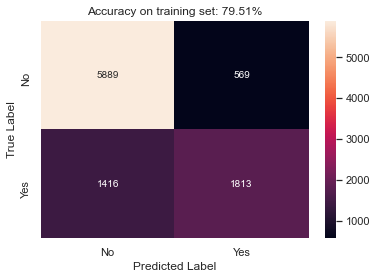

In [93]:
    labels = ['No', 'Yes']
    sns.heatmap(
        confusion_matrix(y_train, trainPredicted),
        annot=True,
        fmt='d',
        yticklabels=labels,
        xticklabels=labels, 
    )
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title("Accuracy on validation set: {:.2f}%".format(accuracy_score(y_train, trainPredicted) * 100))

Text(0.5, 1.0, 'Accuracy on validation set: 87.11%')

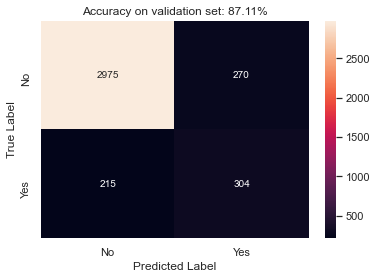

In [94]:
    labels = ['No', 'Yes']
    sns.heatmap(
        confusion_matrix(y_valid, valid_pred),
        annot=True,
        fmt='d',
        yticklabels=labels,
        xticklabels=labels, 
    )
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title("Accuracy on validation set: {:.2f}%".format(accuracy_score(y_valid, valid_pred) * 100))

Text(0.5, 1.0, 'Accuracy on tesing set: 85.44%')

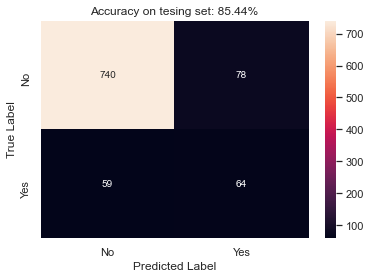

In [107]:
    labels = ['No', 'Yes']
    sns.heatmap(
        confusion_matrix(y_test, grid_predictions_lr),
        annot=True,
        fmt='d',
        yticklabels=labels,
        xticklabels=labels, 
    )
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title("Accuracy on tesing set: {:.2f}%".format(accuracy_score(y_test, grid_predictions_lr) * 100))

The best tuned model parameters given by GridSearchCv were C=0.01, penalty='l2' and solver='liblinear'.
The prediction score from the classification report shows that 45% of the 'Yes' predictions were correct and 93% of the 'No' preditions were correct.
The recall values give the fraction of positives that were correctly identified. With 52% of the 'Yes' predictions being correctly identified and 90% of the 'No' predictions being identified correctly.
The model has a weighted F1 score of 0.86.
The models accuracy on the testing set is 85.44%

When comparing the classification report of this classifier before and after hyerparameter tuning it is apparent that little to no change was made to the classifier.

## Decision Tree

In [113]:
gridsearch_dt = GridSearchCV(pipeline_dt, grid_param_dt,cv=5)
dt_result = gridsearch_dt.fit(X_train,y_train)

#test pred
grid_predictions_dt = gridsearch_dt.predict(X_test)
#valid pred
valid_pred_dt = gridsearch_dt.predict(X_valid)
#train pred
trainPredicted_dt = gridsearch_dt.predict(X_train)

dt_result.score(X_test,y_test)
print("Accuracy: {}".format(gridsearch_dt.score(X_test, y_test)))
print(classification_report(y_test, grid_predictions_dt,target_names=['No', 'Yes']))
print("Tuned Model Parameters: {}".format(gridsearch_dt.best_params_))

Accuracy: 0.824654622741764
              precision    recall  f1-score   support

          No       0.92      0.87      0.90       818
         Yes       0.38      0.51      0.43       123

    accuracy                           0.82       941
   macro avg       0.65      0.69      0.66       941
weighted avg       0.85      0.82      0.84       941

Tuned Model Parameters: {'dt_classifier__criterion': 'entropy', 'dt_classifier__max_depth': 11, 'dt_classifier__splitter': 'random'}


Text(0.5, 1.0, 'Accuracy on training set: 79.51%')

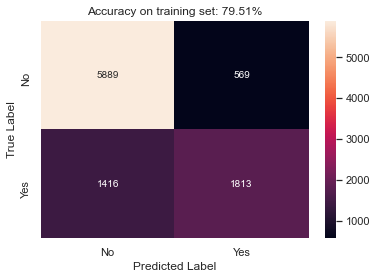

In [98]:
    labels = ['No', 'Yes']
    sns.heatmap(
        confusion_matrix(y_train, trainPredicted_dt),
        annot=True,
        fmt='d',
        yticklabels=labels,
        xticklabels=labels, 
    )
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title("Accuracy on training set: {:.2f}%".format(accuracy_score(y_train, trainPredicted_dt) * 100))

Text(0.5, 1.0, 'Accuracy on validation set: 83.18%')

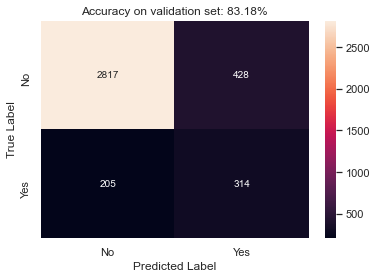

In [109]:
    labels = ['No', 'Yes']
    sns.heatmap(
        confusion_matrix(y_train, trainPredicted_dt),
        annot=True,
        fmt='d',
        yticklabels=labels,
        xticklabels=labels, 
    )
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title("Accuracy on training set: {:.2f}%".format(accuracy_score(y_train, trainPredicted_dt) * 100))

Text(0.5, 1.0, 'Accuracy on testing set: 82.47%')

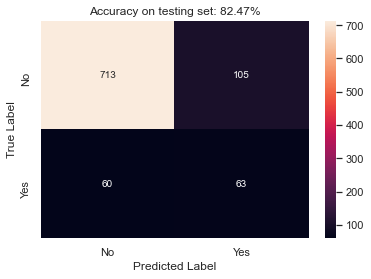

In [108]:
    labels = ['No', 'Yes']
    sns.heatmap(
        confusion_matrix(y_test, grid_predictions_dt),
        annot=True,
        fmt='d',
        yticklabels=labels,
        xticklabels=labels, 
    )
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title("Accuracy on testing set: {:.2f}%".format(accuracy_score(y_test, grid_predictions_dt) * 100))

The best tuned model parameters given by GridSearchCv were criterion=' entropy', max_depth=11 and splitter='random'.
The prediction score from the classification report shows that 38% of the 'Yes' predictions were correct and 92% of the 'No' preditions were correct.
The recall values give the fraction of positives that were correctly identified. With 51% of the 'Yes' predictions being correctly identified and 87% of the 'No' predictions being identified correctly.
The model has a weighted F1 score of 0.84.
The models accuracy on the testing set is 82.47%

When comparing the classification report of this classifier before and after hyerparameter tuning it is apparent that the F1 score and precision score and accuracy improved significantly. With a slight decrease in recall score.

## KNN

In [114]:
gridsearch_knn = GridSearchCV(pipeline_knn, grid_param_knn,cv=5)
knn_result = gridsearch_knn.fit(X_train,y_train)
#test pred
grid_predictions_knn = gridsearch_knn.predict(X_test)
#valid pred
valid_pred_knn = gridsearch_knn.predict(X_valid)
#train pred
trainPredicted_knn = gridsearch_knn.predict(X_train)

knn_result.score(X_test,y_test)
print("Accuracy: {}".format(gridsearch_knn.score(X_test, y_test)))
print(classification_report(y_test, grid_predictions_knn,target_names=['No', 'Yes']))
print("Tuned Model Parameters: {}".format(gridsearch_knn.best_params_))

Accuracy: 0.8384697130712009
              precision    recall  f1-score   support

          No       0.92      0.89      0.91       818
         Yes       0.41      0.51      0.45       123

    accuracy                           0.84       941
   macro avg       0.67      0.70      0.68       941
weighted avg       0.86      0.84      0.85       941

Tuned Model Parameters: {'clf__leaf_size': 1, 'clf__n_neighbors': 5, 'clf__p': 1}


Text(0.5, 1.0, "Accuracy on training set: 84.77%\nTuned Model Parameters: {'clf__leaf_size': 1, 'clf__n_neighbors': 5, 'clf__p': 1}")

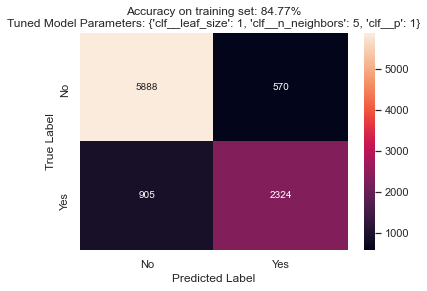

In [118]:
    labels = ['No', 'Yes']
    sns.heatmap(
        confusion_matrix(y_train, trainPredicted_knn),
        annot=True,
        fmt='d',
        yticklabels=labels,
        xticklabels=labels, 
    )
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title("Accuracy on training set: {:.2f}%\nTuned Model Parameters: {}".format(accuracy_score(y_train, trainPredicted_knn) * 100,gridsearch_knn.best_params_))

Text(0.5, 1.0, 'Accuracy on validation set: 83.90%')

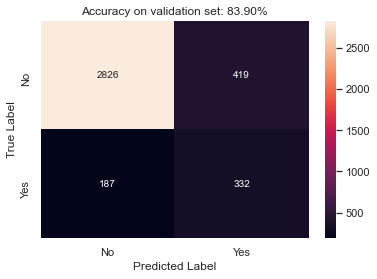

In [110]:
    labels = ['No', 'Yes']
    sns.heatmap(
        confusion_matrix(y_valid, valid_pred_knn),
        annot=True,
        fmt='d',
        yticklabels=labels,
        xticklabels=labels, 
    )
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title("Accuracy on validation set: {:.2f}%".format(accuracy_score(y_valid, valid_pred_knn) * 100))

Text(0.5, 1.0, 'Accuracy on testing set: 83.85%')

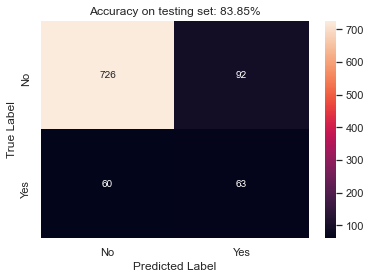

In [111]:
    labels = ['No', 'Yes']
    sns.heatmap(
        confusion_matrix(y_test, grid_predictions_knn),
        annot=True,
        fmt='d',
        yticklabels=labels,
        xticklabels=labels, 
    )
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title("Accuracy on testing set: {:.2f}%".format(accuracy_score(y_test, grid_predictions_knn) * 100))

The best tuned model parameters given by GridSearchCv were leaf_size= 1, n_neighbors= 5 and p=1
The prediction score from the classification report shows that 41% of the 'Yes' predictions were correct and 92% of the 'No' preditions were correct.
The recall values for this model gave 51% of the 'Yes' predictions being correctly identified and 89% of the 'No' predictions being identified correctly.
The model has a weighted F1 score of 0.85.
The models accuracy on the testing set is 83.85%

When comparing the classification report of this classifier before and after hyerparameter tuning it is apparent that there were only slight improvements made to the weighted F1 score, 'Yes' prediction score and the global accuracy.

## Comparision

The F1 score gives the percentage of correct positive predictions.It's also decribed as the weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.Thus the weighted average if the F1 score will be used to compare each model

The classifier with the best weighted F1 score is the Logistic Regression classifier with hyperparameters : C=0.01, penalty='l2' and solver='liblinear'.Although, tuning the hyperparameters made little to no difference it performed slightly better than the other two classifiers.